### COMPANY BANKRUPTCY

In [ ]:
1. 

Import the libraries & dataset 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score , confusion_matrix,ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('BANKRUPTCY_PREDICTION.csv')
df.head(5)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


In [20]:
df.tail(5)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,0.029890,0
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,0.038284,0
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,0.097649,0
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,0.044009,0
6818,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,0.786079,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,0.233902,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [22]:
df.shape

(6819, 95)

#### CHECKING NULL VALUES 

In [23]:
df.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Bankrupt                                                    0
Length: 95, dtype: int64

NO null values 

#### CHECKING FOR IMBALANCE DATASET 

In [24]:
df['Bankrupt'].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

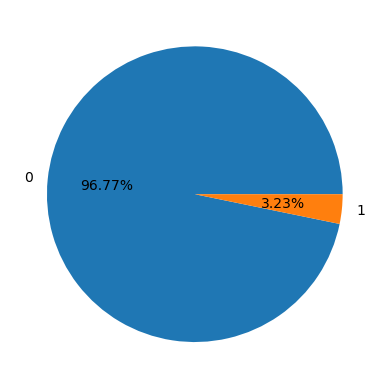

In [25]:
data = df["Bankrupt"].value_counts()
plt.pie(data,autopct='%1.2f%%',labels=data.index)
plt.show()

Dataset is imbalanced 

In [26]:
df.duplicated(keep=False).sum()

0

### DATA PRE-PROCESSING 

In [27]:
X = df.copy() 

y = df['Bankrupt']

X = X.drop(['Bankrupt'], axis=1)

In [28]:
X.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', '

Multicollinearity

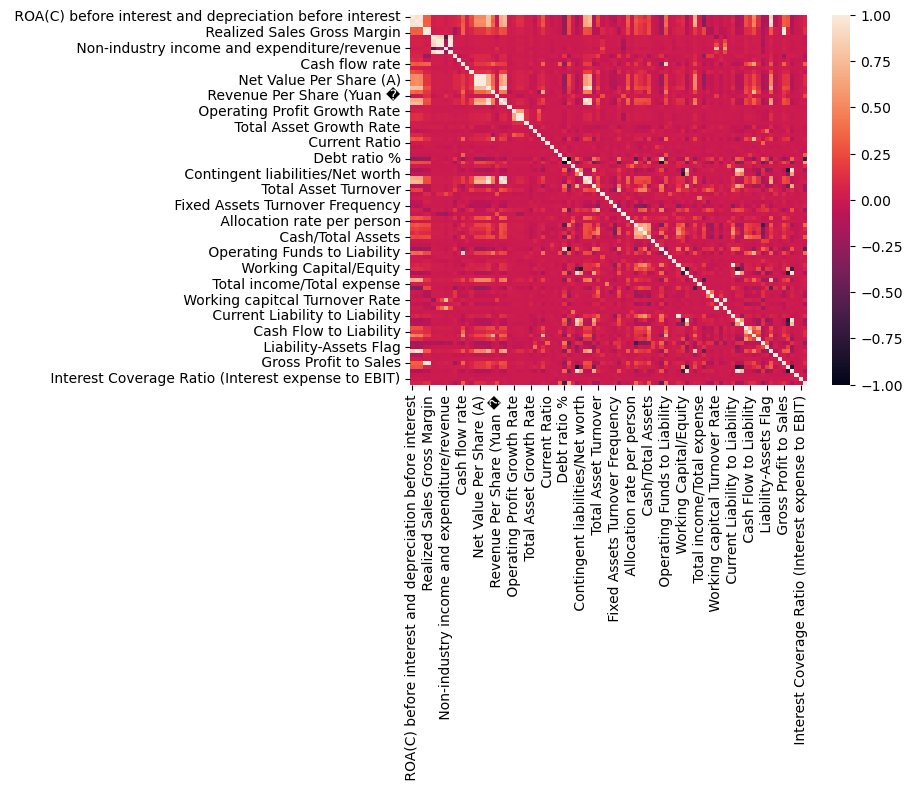

In [88]:
corr = df.drop(columns=['Bankrupt']).corr()
sns.heatmap(corr);

In [29]:
#Split to data train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

#### Balancing the data 

In [33]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1234)

X_smote, y_smote = sm.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_smote.shape}''')

print('\nBalance of positive and negative classes (%):')
y_smote.value_counts(normalize=True) * 100

Shape of X before SMOTE: (6819, 94)
Shape of X after SMOTE: (10550, 94)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Bankrupt, dtype: float64

### Feature Scaling 

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_smote = sc.fit_transform(X_smote)
X_test = sc.transform(X_test)

### Modelling 

In [38]:
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [[CatBoostClassifier(verbose=0),'CatBoost Classifier'],[XGBClassifier(),'XGB Classifier'], [RandomForestClassifier(),'Random Forest'], 
    [KNeighborsClassifier(), 'K-Nearest Neighbours'], [SGDClassifier(),'SGD Classifier'], [SVC(),'SVC'],[LGBMClassifier(),'LGBM Classifier'],
              [GaussianNB(),'GaussianNB'],[DecisionTreeClassifier(),'Decision Tree Classifier'],[LogisticRegression(),'Logistic Regression']]

In [89]:
for cls in classifiers:
    model = cls[0]
    model.fit(X_smote, y_smote)
    
    y_pred = model.predict(X_test)
    print(cls[1])
    print ('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
    print("Recall : ", recall_score(y_test, y_pred) *  100)
    print("Precision : ", precision_score(y_test, y_pred) *  100)
    print("F1 : ", f1_score(y_test, y_pred) *  100)
    print("\n\n\n")

CatBoost Classifier
Confusion Matrix:
[[1289   35]
 [  20   20]]
Accuracy :  95.96774193548387
Recall :  50.0
Precision :  36.36363636363637
F1 :  42.10526315789474




XGB Classifier
Confusion Matrix:
[[1290   34]
 [  19   21]]
Accuracy :  96.11436950146629
Recall :  52.5
Precision :  38.18181818181819
F1 :  44.21052631578947




Random Forest
Confusion Matrix:
[[1282   42]
 [  17   23]]
Accuracy :  95.67448680351906
Recall :  57.49999999999999
Precision :  35.38461538461539
F1 :  43.8095238095238




K-Nearest Neighbours
Confusion Matrix:
[[1194  130]
 [  13   27]]
Accuracy :  89.51612903225806
Recall :  67.5
Precision :  17.197452229299362
F1 :  27.411167512690355




SGD Classifier
Confusion Matrix:
[[1166  158]
 [  10   30]]
Accuracy :  87.68328445747801
Recall :  75.0
Precision :  15.957446808510639
F1 :  26.315789473684216




SVC
Confusion Matrix:
[[1243   81]
 [  15   25]]
Accuracy :  92.96187683284457
Recall :  62.5
Precision :  23.58490566037736
F1 :  34.24657534246575




L

In [92]:
clf1 =LGBMClassifier()
clf1.fit(X_smote, y_smote)

prediction = clf1.predict(X_test)





In [93]:
 prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:

submission = pd.DataFrame(prediction)
submission.to_csv("Submission.csv")